In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import os
import cv2
import pydrive
from PIL import Image, ImageEnhance, ImageOps
import cv2
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/Shareddrives/ML Project data/asl_alphabet_test_zip.zip' -d '/content/asl_alphabet_test'

Archive:  /content/drive/Shareddrives/ML Project data/asl_alphabet_test_zip.zip
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/J/J_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/R/R_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/I/I_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/U/U_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/P/P_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/N/N_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/O/O_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/G/G_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/W/W_test.jpg  
  inflating: /content/asl_alphabet_test/asl_alphabet_test/asl_alphabet_test/F/F_test.jpg  
  inflatin

In [ ]:
!unzip '/content/drive/Shareddrives/ML Project data/asl_alphabet_train_zip.zip' -d '/content/asl_alphabet_train'

In [ ]:
# The labels have to be numeric so this will be used for that  
alphabet = ['A', 'B', 'C', 'D', 'E','F','G','H','I', 'J', 'K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
alphabet_code= list(range(0,29))

In [ ]:
def create_dataset(img_folder, N=29000):
    img_data_array = np.empty((N, 100, 100, 3), dtype=np.float16)
    class_name=np.empty((N,1), dtype=np.int16)
    i=0
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2GRAY) #replace with cv2.COLOR_BGR2GRAY for greyscale cv2.COLOR_BGR2RGB for color
            im1= cv2.resize(image, (100, 100))
            img_data_array[i]=im1/255
            class_name[i]=alphabet_code[alphabet.index(dir1)] #Labels will be numeric
            i += 1 
    return img_data_array, class_name

In [ ]:
#create inverted training data set
def create_dataset(img_folder, N=29000):
    img_data_array = np.empty((N, 100, 100, 1), dtype=np.float16)
    class_name=np.empty((N,1), dtype=np.int16)
    i=0
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2GRAY) #replace with cv2.COLOR_BGR2GRAY for greyscale cv2.COLOR_BGR2RGB for color
            #image = ~image
            im1= cv2.resize(image, (100, 100))
            img_data_array[i]=im1/255
            class_name[i]=alphabet_code[alphabet.index(dir1)] #Labels will be numeric
            i += 1 
    return img_data_array, class_name

In [ ]:
img_data, class_name = create_dataset('/content/asl_alphabet_train/asl_alphabet_train') 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img_data,class_name,test_size=0.10)

In [ ]:
#clear up some space
del img_data, class_name

import tensorflow.keras.backend as K
img_data_tens = K.constant(img_data)
img_data_tens_test = K.constant(img_data_test)

from sklearn import preprocessing
import torch
le = preprocessing.LabelEncoder()
targets = le.fit_transform(class_name)
targets_test = le.fit_transform(class_name_test)

class_targets = torch.as_tensor(targets)
class_targets_test = torch.as_tensor(targets_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation((-0.8, 0.8)),
    layers.experimental.preprocessing.RandomContrast(0.7),
    layers.experimental.preprocessing.RandomFlip()
])

In [ ]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(100, 100))) #change this shape to (100,100,3)
model.add(layers.MaxPooling2D((3, 3),padding='same'))
model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3),padding='same'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3),padding='same'))
model.add(layers.Conv2D(64, (3, 3),padding='same',  activation='relu'))
model.add(layers.MaxPooling2D((3, 3),padding='same'))
model.add(layers.Conv2D(128, (3, 3),padding='same',  activation='relu'))
model.add(layers.MaxPooling2D((3, 3),padding='same'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(29))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, 
                    validation_data=(x_test, y_test))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
model.save('/content/drive/Shareddrives/ML Project data/cnnmodel_invertgreyscale.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/Shareddrives/ML Project data/cnnmodel_mikayla.h5')

91/91 - 7s - loss: 0.3532 - accuracy: 0.8800 - 7s/epoch - 79ms/step


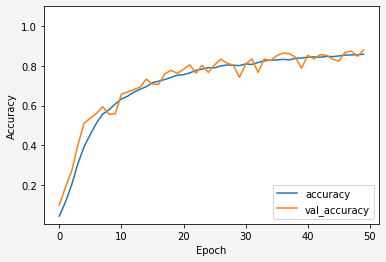

In [ ]:
plt.figure(facecolor='whitesmoke')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.005, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Prediction Data from video

In [ ]:
!unzip '/content/drive/Shareddrives/ML Project data/procimages_zip.zip' -d '/content/vid_images'

Archive:  /content/drive/Shareddrives/ML Project data/procimages_zip.zip
   creating: /content/vid_images/procimages/A/
  inflating: /content/vid_images/procimages/A/imgsm37.tiff  
   creating: /content/vid_images/procimages/B/
  inflating: /content/vid_images/procimages/B/imgsm30.tiff  
  inflating: /content/vid_images/procimages/B/imgsm41.tiff  
   creating: /content/vid_images/procimages/C/
  inflating: /content/vid_images/procimages/C/imgsm39.tiff  
  inflating: /content/vid_images/procimages/C/imgsm6.tiff  
   creating: /content/vid_images/procimages/D/
  inflating: /content/vid_images/procimages/D/imgsm34.tiff  
  inflating: /content/vid_images/procimages/D/imgsm4.tiff  
   creating: /content/vid_images/procimages/E/
  inflating: /content/vid_images/procimages/E/imgsm2.tiff  
  inflating: /content/vid_images/procimages/E/imgsm46.tiff  
   creating: /content/vid_images/procimages/F/
  inflating: /content/vid_images/procimages/F/imgsm17.tiff  
  inflating: /content/vid_images/proci

I tried making prediction on data from a different video. Inverted images of the originals (still color). Next I want to try inverted images in the greyscale but need to retrain model on greyscale images.

In [ ]:
def create_vid_dataset(img_folder, N=49):
    img_data_array = np.empty((N, 100, 100,3), dtype=np.float16)
    vidnumvalues=np.empty((N,1), dtype=np.int16)
    i=0
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            im1=cv2.resize(image, (100, 100))
            img_data_array[i]=im1/2
            vidnumvalues[i]=alphabet_code[alphabet.index(dir1)]#Labels will be numeric
            i += 1 
    return img_data_array, vidnumvalues
#vid_data, vidnumvalues = create_vid_dataset('/content/vid_images/procimages/', N=49)
#vid_data, vidnumvalues = create_vid_dataset('/content/drive/Shareddrives/ML Project data/procimages2/')
#vid_data, vidnumvalues = create_vid_dataset('/content/drive/Shareddrives/ML Project data/invertedimagescolor/')
vid_data, vidnumvalues = create_vid_dataset('/content/drive/Shareddrives/ML Project data/invertedimages/')

In [ ]:
vidnumvaluesinvert = ['nothing','K', 'E', 'V','D', 'V', 'C']
vidnumvaluesproc2 = ['K','C','W','nothing','nothing','nothing']

In [ ]:

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(vid_data)

ValueError: ignored

In [ ]:
predclass=[]
predclasses= np.empty(len(predictions))
alphapred= [None] * len(predictions)
for i in range(len(predictions)):
  predclass = np.argmax(predictions[i])
  predclasses[i] = predclass
  alphapred[i] = alphabet[alphabet_code.index(predclasses[i])]

In [ ]:
pred_loss, pred_acc = model.evaluate(vid_data,  vidnumvalues, verbose=2)

2/2 - 0s - loss: 10599.9697 - accuracy: 0.0816 - 124ms/epoch - 62ms/step


In [ ]:
alphapred

['T',
 'P',
 'E',
 'Y',
 'G',
 'L',
 'G',
 'L',
 'G',
 'L',
 'P',
 'G',
 'D',
 'W',
 'L',
 'E',
 'P',
 'P',
 'P',
 'H',
 'P',
 'E',
 'P',
 'P',
 'W',
 'Y',
 'O',
 'Y',
 'W',
 'Y',
 'L',
 'J',
 'F',
 'P',
 'W',
 'J',
 'L',
 'L',
 'Y',
 'Y',
 'G',
 'P',
 'P',
 'Y',
 'P',
 'Y',
 'P',
 'W',
 'Y',
 'A',
 'Y',
 'W',
 'A',
 'M',
 'W',
 'L',
 'Y',
 'T',
 'P',
 'T',
 'J',
 'P',
 'W',
 'Y',
 'P',
 'P',
 'W',
 'D',
 'P',
 'T',
 'W',
 'J',
 'L',
 'T',
 'P',
 'T',
 'T',
 'L',
 'J',
 'P',
 'A']

In [ ]:
# Correct Values
alphacorrect= [None] * len(vidnumvalues)
for i in range(len(vidnumvalues)):
  alphacorrect[i] = alphabet[alphabet_code.index(vidnumvalues[i])]

alphacorrect

ValueError: ignored

Text(0, 0.5, 'True Values')

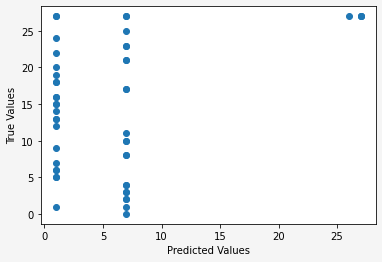

In [ ]:
plt.figure(facecolor='whitesmoke') 
plt.scatter(predclasses, vidnumvalues) 
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

Import video stuff
This is just how we got the images from the video

In [ ]:
!pip install pytube

In [ ]:
from pytube import YouTube
#yt = YouTube("https://www.youtube.com/watch?v=OiS1dbsxP-Q")
yt = YouTube(" https://www.youtube.com/watch?v=tkMg8g8vVUo")
yt.title
yt.streams.all()

In [ ]:
stream = yt.streams.filter(progressive=True, file_extension='mp4')[0]
strm = stream.download()

In [ ]:
import cv2
vidcap = cv2.VideoCapture(strm)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".tiff", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 2 #//it will capture image in each second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
!pip install pims

In [ ]:
path = "/content/*.*"
files = glob.glob(path) 
for i in range(len(files)):
  file = files[i]
  if file.endswith('.tiff'):
    img = Image.open(file)
    im = img.convert('L')
    #pixels = asarray(image)
    # convert from integers to floats
    #pixels = pixels.astype('float32')
    # calculate global mean and standard deviation
    #mean, std = pixels.mean(), pixels.std()
    #pixels = (pixels - mean) / std
    #pixels = clip(pixels, -1.0, 1.0)
    #pixels = (pixels + 1.0) / 2.0
    #img = pixels
    #cropping to be only top left window
    #width, height = im.size
    #left = 350
    #top = height/30
    #right = 600
    #bottom =  height *(7/10)
    width, height = im.size
    left = 40
    top = height/1000
    right = 220
    bottom =  height/2
 
    im1 = im.crop((left, top, right, bottom))
    basewidth = 200
    wpercent = (basewidth/float(im1.size[0]))
    hsize = 200
    imgsm = im1.resize((basewidth,hsize), Image.ANTIALIAS)
    pix_val = list(imgsm.getdata())
    len(pix_val)
    prednewimg = model.predict(imgsm)
    prednewimgs = prednewimgs.append(prednewimg)

In [ ]:
#truevidimagevalues = ['A','B','B','C','C','D','D','E','E','F','F','G','G','H','I','I','J','K','K','L','nothing','M','N','N','O','P','P','Q','Q','R','R','S','S','T','U','V','V','W','X','X','Y','Z','Z','nothing','nothing','nothing']
truevidimagevalues = ['P','E','V','D','V','C','Q','R','J','T','nothing','Z','X','G','X','I','F','nothing','R','F','O','I','P','nothing','A','N','W','notihng','G','B','L','nothing','D','nothing','S','A','K','C','K','B','nothing','H','T','Q','E','Y','A']
for i in range(len(truevidimagevalues)):
    vidnumvalues.append([alphabet_code[alphabet.index(truevidimagevalues[i])]])

(array([36.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <a list of 10 Patch objects>)

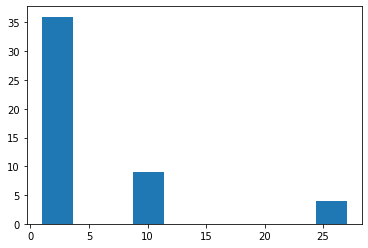

In [ ]:
plt.hist(predclasses)

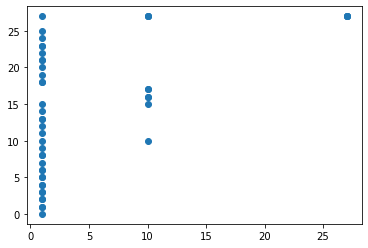

In [ ]:
plt.scatter(predclasses, vidnumvalues) 